In [294]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from joblib import Parallel, delayed, dump, load
import joblib
from sklearn.model_selection import train_test_split

In [295]:
df = pd.read_csv('final_station1_df_mover_full_.csv')


In [296]:
print(df.shape)


(136572, 21)


In [297]:
df

,carb_pos_low__maximum,carb_pos_low__mean,carb_pos_low__minimum,carb_pos_low__standard_deviation,carb_pos_low__variance,carb_val_low__maximum,carb_val_low__mean,carb_val_low__minimum,carb_val_low__standard_deviation,carb_val_low__variance,...,pp_pos_low__mean,pp_pos_low__minimum,pp_pos_low__standard_deviation,pp_pos_low__variance,pp_val_low__maximum,pp_val_low__mean,pp_val_low__minimum,pp_val_low__standard_deviation,pp_val_low__variance,reject
0,0.177033,0.152347,0.085864,0.038500,0.001482,550.0,442.500000,280.0,103.289641,10668.750000,...,0.026277,0.023741,0.002536,6.432310e-06,690.0,205.000000,-280.0,485.000000,235225.000000,0.0
1,0.177425,0.154459,0.093344,0.035407,0.001254,550.0,375.000000,170.0,146.543509,21475.000000,...,0.004275,0.004083,0.000192,3.697929e-08,690.0,215.000000,-260.0,475.000000,225625.000000,0.0
2,0.176992,0.128322,0.038884,0.055020,0.003027,620.0,415.000000,160.0,185.135086,34275.000000,...,0.012600,0.004149,0.011426,1.305641e-04,720.0,376.666667,-300.0,478.493005,228955.555556,0.0
3,0.177377,0.136073,0.038915,0.057110,0.003262,610.0,490.000000,340.0,98.234414,9650.000000,...,0.026002,0.023243,0.002758,7.608219e-06,700.0,560.000000,420.0,140.000000,19600.000000,0.0
4,0.177385,0.158086,0.127505,0.020616,0.000425,530.0,410.000000,250.0,107.004673,11450.000000,...,0.018708,0.018708,0.000000,0.000000e+00,710.0,710.000000,710.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136567,0.177328,0.133352,0.085593,0.043912,0.001928,630.0,385.000000,140.0,185.809042,34525.000000,...,0.022603,0.016388,0.006215,3.862747e-05,730.0,260.000000,-210.0,470.000000,220900.000000,0.0
136568,0.177325,0.119904,0.038829,0.057165,0.003268,640.0,510.000000,300.0,129.807550,16850.000000,...,0.013973,0.004112,0.010652,1.134623e-04,720.0,373.333333,-290.0,469.207369,220155.555556,0.0
136569,0.177363,0.154456,0.093450,0.035347,0.001249,580.0,410.000000,230.0,137.658999,18950.000000,...,0.020278,0.011797,0.008481,7.192058e-05,730.0,715.000000,700.0,15.000000,225.000000,0.0
136570,0.177477,0.160485,0.127508,0.023322,0.000544,520.0,376.666667,250.0,110.855261,12288.888889,...,0.028768,0.028768,0.000000,0.000000e+00,700.0,700.000000,700.0,0.000000,0.000000,0.0


In [298]:
# df = df.dropna(axis=1, how='any')
# df = df.drop(columns=['StationID', 'mov_id'], errors='ignore')

In [299]:
df.shape

(136572, 21)

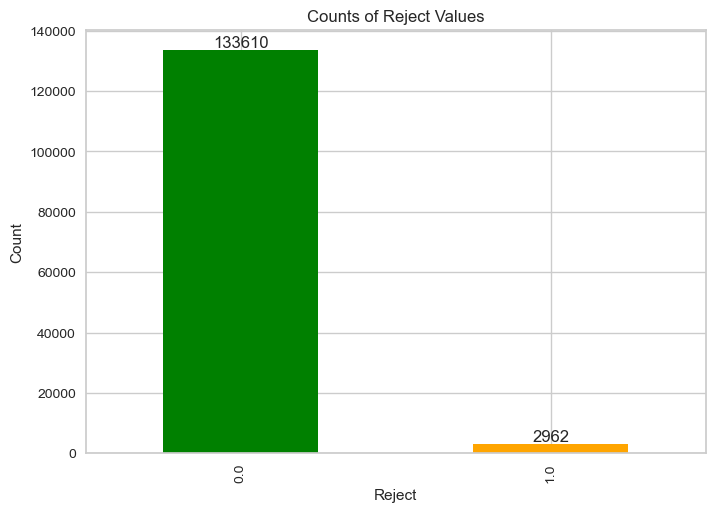

In [300]:
reject_counts = df['reject'].value_counts()

# Define colors for the bars
colors = ['green', 'orange']

# Create a bar plot with specified colors
fig, ax = plt.subplots()
reject_counts.plot(kind='bar', ax=ax, color=colors)

# Annotate the count numbers on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('Reject')
ax.set_ylabel('Count')
ax.set_title('Counts of Reject Values')

# Show plot
plt.show()

In [301]:
# Take half of each class using slicing
class_0 = df.loc[df.iloc[:, -1] == 0]  # Filter rows where class is 0
class_1 = df.loc[df.iloc[:, -1] == 1]  # Filter rows where class is 1

half_class_0 = class_0.iloc[:len(class_0) // 4]  # Take first half of class 0
half_class_1 = class_1.iloc[:int(len(class_1) // 2)]


# Combine the halves
df_balanced = pd.concat([half_class_0, half_class_1]).sample(frac=1, random_state=42)  # Shuffle the combined dataset


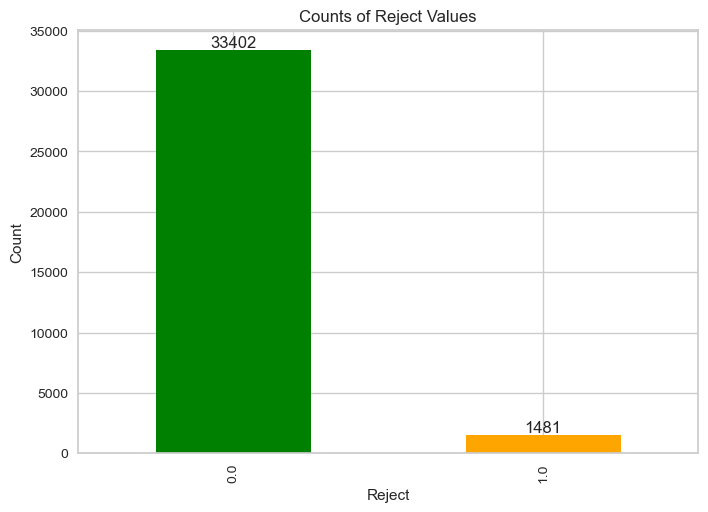

In [302]:
reject_counts = df_balanced['reject'].value_counts()

# Define colors for the bars
colors = ['green', 'orange']

# Create a bar plot with specified colors
fig, ax = plt.subplots()
reject_counts.plot(kind='bar', ax=ax, color=colors)

# Annotate the count numbers on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('Reject')
ax.set_ylabel('Count')
ax.set_title('Counts of Reject Values')

# Show plot
plt.show()

In [303]:
# # Install PyCaret if not installed
# # pip install pycaret

# from pycaret.classification import *
# import pandas as pd
# from imblearn.over_sampling import SMOTE

# # Convert the dataset to features and labels
# X_combined = df_balanced.iloc[:, :-1]  # Features (all columns except the last one)
# y_combined = df_balanced.iloc[:, -1]   # Labels (the last column)

# # Apply SMOTE to balance the classes
# smote = SMOTE(sampling_strategy=0.5, random_state=42)
# X_smote, y_smote = smote.fit_resample(X_combined, y_combined)

# # Combine features and labels into a single DataFrame (required by PyCaret)
# df_smote = pd.DataFrame(X_smote, columns=X_combined.columns)
# df_smote['target'] = y_smote  # Add the target column

# # Initialize the PyCaret classification setup
# clf_setup = setup(
#     data=df_smote,
#     target='target',      # Specify the target column
#     train_size=0.8,       # 80% training, 20% testing
#     normalize=True,       # Normalize the features (like StandardScaler)
#     session_id=42         # Random seed for reproducibility
# )

# # Compare all models
# best_model = compare_models(sort='Accuracy')  # Sort by Accuracy (can change to AUC, F1, etc.)

# # Print the best model
# print(f"Best Model: {best_model}")

# # Display all available models and their metrics
# models = pull()
# print(models)

# # Plot the top 3 models
# plot_model(best_model, plot='confusion_matrix')  # Confusion Matrix for the best model
# plot_model(best_model, plot='auc')              # AUC-ROC Curve for the best model
# plot_model(best_model, plot='feature')          # Feature Importance (if applicable)

# # Finalize the best model (fit it on the entire dataset)
# final_best_model = finalize_model(best_model)

# # Predict on the test data
# predictions = predict_model(final_best_model)

# # Print predictions
# print(predictions)


In [304]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE


def train_transformer_model(df, use_smote=True, sampling_strategy=0.25, random_state=42):
    """
    Train a Transformer model with explicit 70%-15%-15% train-validation-test split.

    Parameters:
        df (pd.DataFrame): DataFrame with features and labels (last column as label).
        use_smote (bool): Whether to apply SMOTE for balancing the classes.
        sampling_strategy (float): Sampling strategy for SMOTE (used only if use_smote is True).
        random_state (int): Random seed for reproducibility.

    Returns:
        transformer_model: Trained Transformer model.
        history: Training history of the model.
        classification_report: Classification report on the test set.
        confusion_matrix: Confusion matrix on the test set.
    """
    # Data Preparation
    X = df.iloc[:, :-1].values  # Features
    y = df.iloc[:, -1].values   # Labels (imbalanced)

    # Apply SMOTE if required
    if use_smote:
        smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
        X, y = smote.fit_resample(X, y)

    # First split: 85% training+validation and 15% testing
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

    # Second split: 70% training and 15% validation from the 85% training+validation set
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.17647, random_state=42)

    # Z-score normalization
    X_train_scaled = zscore(X_train, axis=0)
    X_val_scaled = zscore(X_val, axis=0)
    X_test_scaled = zscore(X_test, axis=0)

    # Reshape the data for the Transformer model
    X_train_transformed = np.expand_dims(X_train_scaled, axis=1)
    X_val_transformed = np.expand_dims(X_val_scaled, axis=1)
    X_test_transformed = np.expand_dims(X_test_scaled, axis=1)

    # Define the Transformer Model
    def build_transformer_model(input_dim):
        input_layer = tf.keras.layers.Input(shape=(1, input_dim))  # Input with sequence length = 1
        transformer_block = TransformerEncoder(embed_dim=input_dim, num_heads=4, ff_dim=64)(input_layer)
        flatten = tf.keras.layers.Flatten()(transformer_block)
        dense_1 = tf.keras.layers.Dense(64, activation="relu")(flatten)
        dropout = tf.keras.layers.Dropout(0.2)(dense_1)
        output_layer = tf.keras.layers.Dense(1, activation="sigmoid")(dropout)  # Binary classification

        model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
        return model

    # Define Transformer Encoder block
    class TransformerEncoder(tf.keras.layers.Layer):
        def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
            super(TransformerEncoder, self).__init__()
            self.att = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
            self.ffn = tf.keras.Sequential(
                [tf.keras.layers.Dense(ff_dim, activation="relu"), tf.keras.layers.Dense(embed_dim)]
            )
            self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
            self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
            self.dropout1 = tf.keras.layers.Dropout(rate)
            self.dropout2 = tf.keras.layers.Dropout(rate)

        def call(self, inputs, training):
            attn_output = self.att(inputs, inputs)
            attn_output = self.dropout1(attn_output, training=training)
            out1 = self.layernorm1(inputs + attn_output)
            ffn_output = self.ffn(out1)
            ffn_output = self.dropout2(ffn_output, training=training)
            return self.layernorm2(out1 + ffn_output)

    # Build the model
    input_dim = X_train_transformed.shape[2]
    transformer_model = build_transformer_model(input_dim)

    # Compile the model
    transformer_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    # Early Stopping Callback
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",   # Monitor validation loss
        patience=5,           # Stop training after 5 epochs of no improvement
        restore_best_weights=True  # Restore weights of the best epoch
    )

    # Train the model
    history = transformer_model.fit(
        X_train_transformed, y_train,
        validation_data=(X_val_transformed, y_val),
        epochs=50,
        batch_size=32,
        callbacks=[early_stopping],  # Include Early Stopping callback
        verbose=1
    )

    # Evaluate the model
    y_pred_prob = transformer_model.predict(X_test_transformed).flatten()
    y_pred = (y_pred_prob > 0.5).astype(int)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Plot Confusion Matrix as a Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel("**Predicted**", fontweight="bold")
    plt.ylabel("**Actual**", fontweight="bold")
    plt.title("**Confusion Matrix**", fontweight="bold")
    plt.show()
    
    # Plot Training and Validation Loss and Accuracy
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='**Training Loss**', marker='o')
    plt.plot(val_loss, label='**Validation Loss**', marker='o')
    plt.title('**Loss Curve**', fontweight="bold")
    plt.xlabel('**Epochs**', fontweight="bold")
    plt.ylabel('**Loss**', fontweight="bold")
    plt.legend()
    plt.grid()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='**Training Accuracy**', marker='o')
    plt.plot(val_acc, label='**Validation Accuracy**', marker='o')
    plt.title('**Accuracy Curve**', fontweight="bold")
    plt.xlabel('**Epochs**', fontweight="bold")
    plt.ylabel('**Accuracy**', fontweight="bold")
    plt.legend()
    plt.grid()
    
    plt.tight_layout()
    plt.show()
    
    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"**ROC curve (area = {roc_auc:.2f})**")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.title("**Receiver Operating Characteristic (ROC) Curve**", fontweight="bold")
    plt.xlabel("**False Positive Rate**", fontweight="bold")
    plt.ylabel("**True Positive Rate**", fontweight="bold")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

    return transformer_model, history, classification_report(y_test, y_pred, output_dict=True), cm


# Example Usage
# transformer_model, history, report, cm = train_transformer_model(df, use_smote=True, sampling_strategy=0.25)


Epoch 1/50
877/877 [==============================] - 8s 6ms/step - loss: 0.4109 - accuracy: 0.8298 - val_loss: 0.3929 - val_accuracy: 0.8350
Epoch 2/50
877/877 [==============================] - 7s 8ms/step - loss: 0.3979 - accuracy: 0.8323 - val_loss: 0.3822 - val_accuracy: 0.8379
Epoch 3/50
877/877 [==============================] - 4s 5ms/step - loss: 0.3925 - accuracy: 0.8335 - val_loss: 0.3778 - val_accuracy: 0.8382
Epoch 4/50
877/877 [==============================] - 5s 5ms/step - loss: 0.3887 - accuracy: 0.8355 - val_loss: 0.3753 - val_accuracy: 0.8417
Epoch 5/50
877/877 [==============================] - 4s 5ms/step - loss: 0.3831 - accuracy: 0.8372 - val_loss: 0.3701 - val_accuracy: 0.8447
Epoch 6/50
877/877 [==============================] - 4s 5ms/step - loss: 0.3783 - accuracy: 0.8400 - val_loss: 0.3719 - val_accuracy: 0.8440
Epoch 7/50
877/877 [==============================] - 6s 6ms/step - loss: 0.3733 - accuracy: 0.8433 - val_loss: 0.3581 - val_accuracy: 0.8535
Epoch 

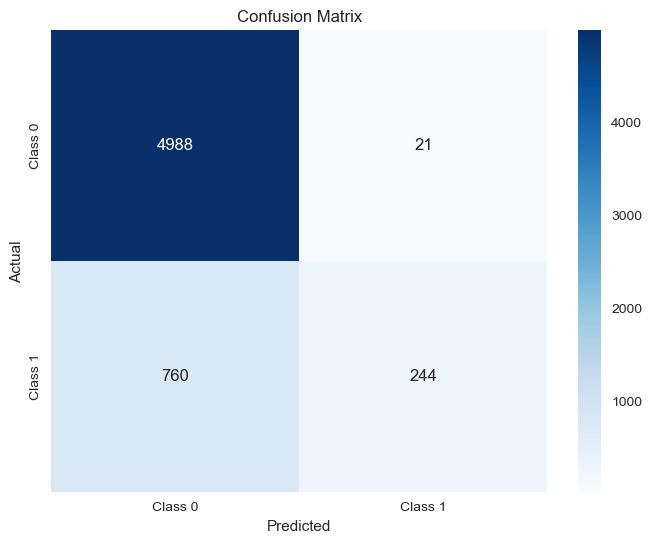

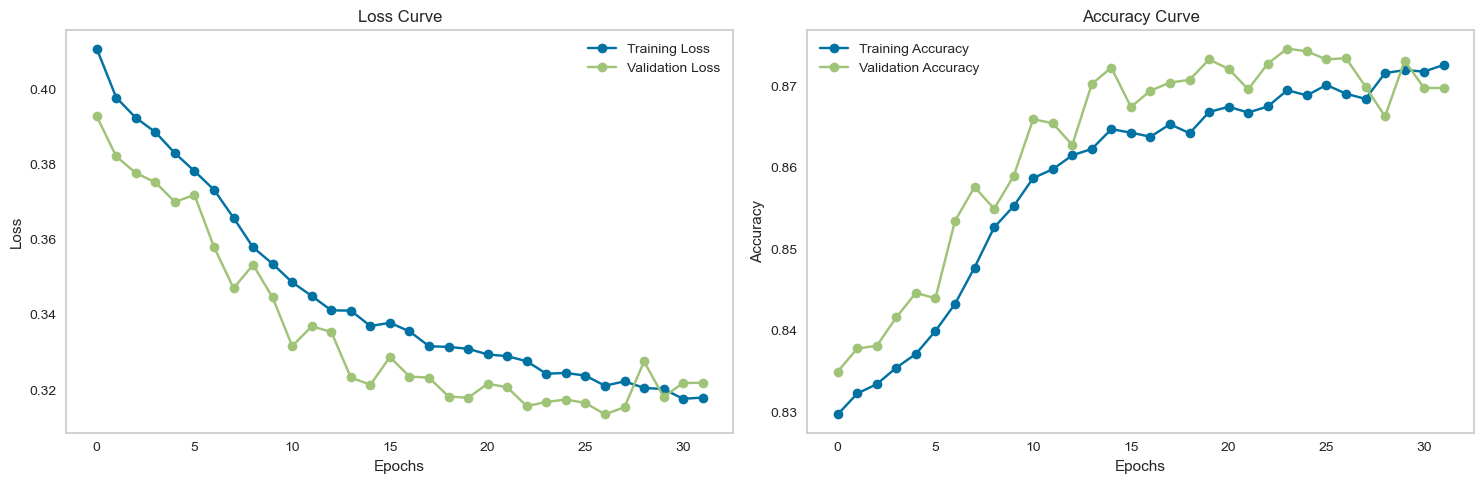

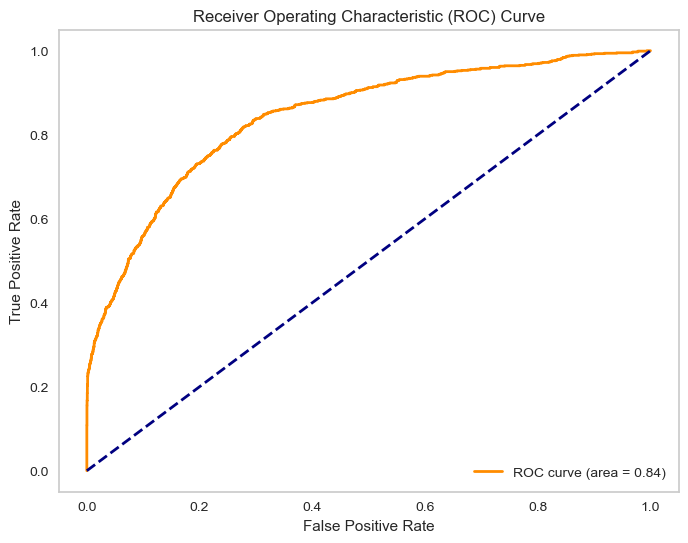

In [305]:
# Example Usage
final_model20, history20, report20, confusion20 = train_transformer_model(df_balanced, use_smote=True, sampling_strategy=0.20)

Epoch 1/50
950/950 [==============================] - 8s 5ms/step - loss: 0.4751 - accuracy: 0.7720 - val_loss: 0.4605 - val_accuracy: 0.7739
Epoch 2/50
950/950 [==============================] - 4s 5ms/step - loss: 0.4580 - accuracy: 0.7836 - val_loss: 0.4557 - val_accuracy: 0.7662
Epoch 3/50
950/950 [==============================] - 4s 5ms/step - loss: 0.4487 - accuracy: 0.7851 - val_loss: 0.4409 - val_accuracy: 0.7875
Epoch 4/50
950/950 [==============================] - 4s 4ms/step - loss: 0.4401 - accuracy: 0.7928 - val_loss: 0.4261 - val_accuracy: 0.8001
Epoch 5/50
950/950 [==============================] - 4s 4ms/step - loss: 0.4303 - accuracy: 0.7996 - val_loss: 0.4129 - val_accuracy: 0.8015
Epoch 6/50
950/950 [==============================] - 4s 4ms/step - loss: 0.4183 - accuracy: 0.8086 - val_loss: 0.3977 - val_accuracy: 0.8176
Epoch 7/50
950/950 [==============================] - 4s 4ms/step - loss: 0.4107 - accuracy: 0.8137 - val_loss: 0.3983 - val_accuracy: 0.8201
Epoch 

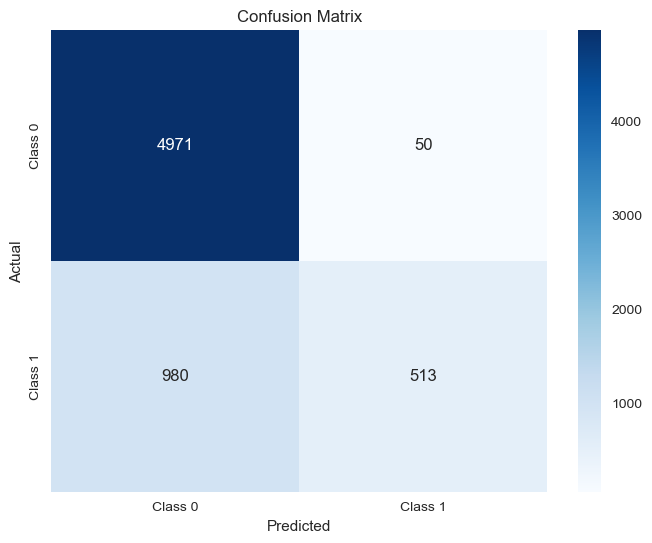

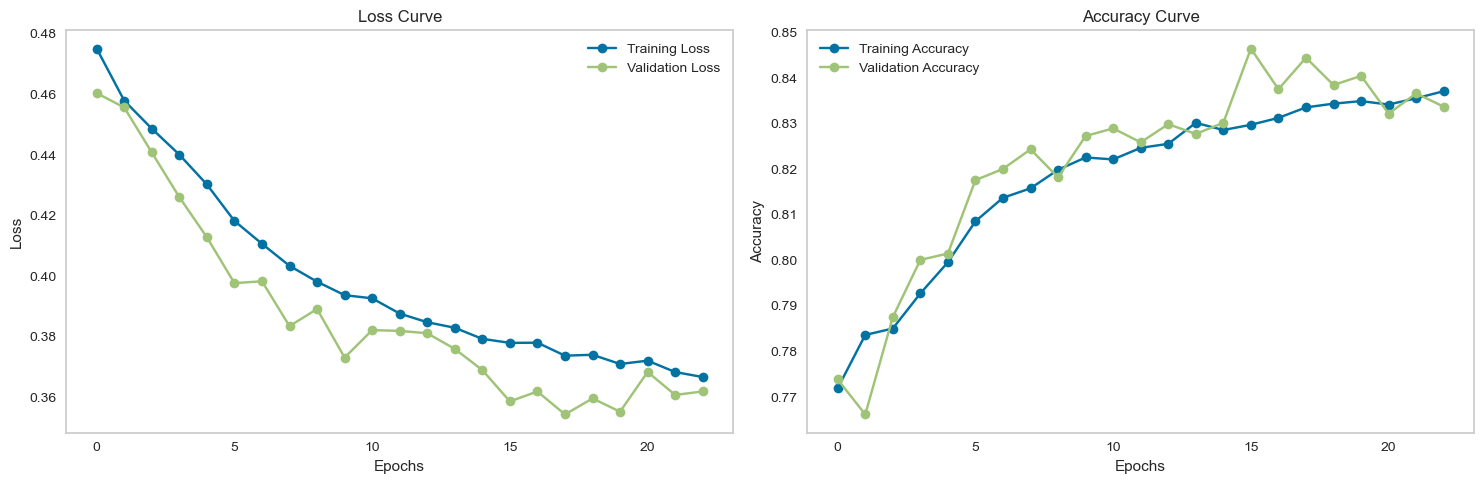

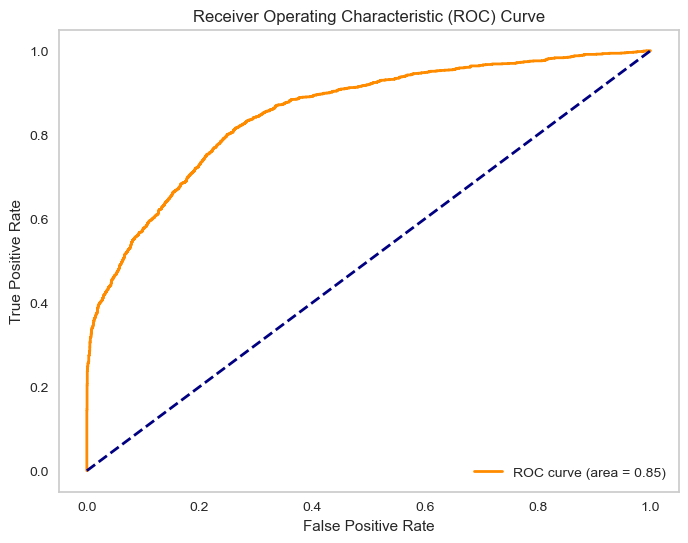

In [306]:
# Example Usage
final_model30, history30, report30, confusion30 = train_transformer_model(df_balanced, use_smote=True, sampling_strategy=0.30)

Epoch 1/50
1023/1023 [==============================] - 7s 5ms/step - loss: 0.5277 - accuracy: 0.7270 - val_loss: 0.5164 - val_accuracy: 0.7327
Epoch 2/50
1023/1023 [==============================] - 4s 4ms/step - loss: 0.5034 - accuracy: 0.7440 - val_loss: 0.4940 - val_accuracy: 0.7507
Epoch 3/50
1023/1023 [==============================] - 5s 5ms/step - loss: 0.4913 - accuracy: 0.7512 - val_loss: 0.4806 - val_accuracy: 0.7611
Epoch 4/50
1023/1023 [==============================] - 4s 4ms/step - loss: 0.4787 - accuracy: 0.7613 - val_loss: 0.4625 - val_accuracy: 0.7762
Epoch 5/50
1023/1023 [==============================] - 5s 5ms/step - loss: 0.4655 - accuracy: 0.7710 - val_loss: 0.4628 - val_accuracy: 0.7706
Epoch 6/50
1023/1023 [==============================] - 4s 4ms/step - loss: 0.4548 - accuracy: 0.7773 - val_loss: 0.4429 - val_accuracy: 0.7857
Epoch 7/50
1023/1023 [==============================] - 5s 5ms/step - loss: 0.4455 - accuracy: 0.7862 - val_loss: 0.4538 - val_accuracy:

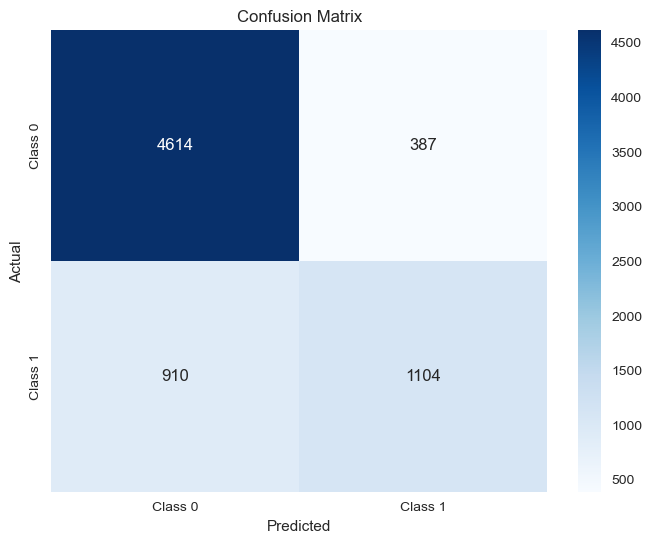

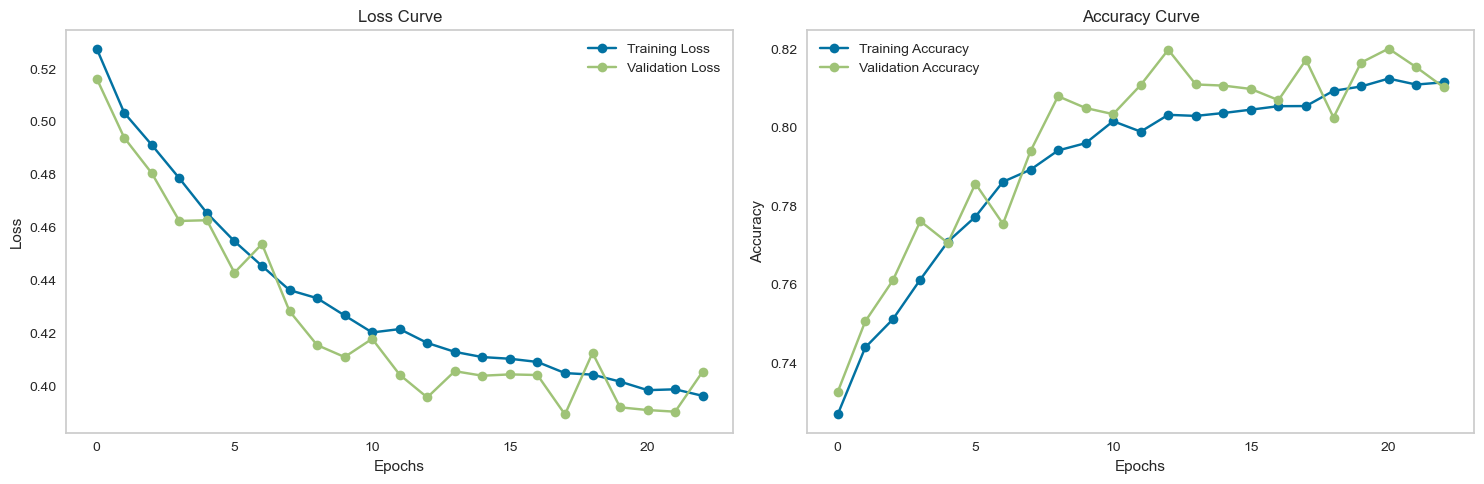

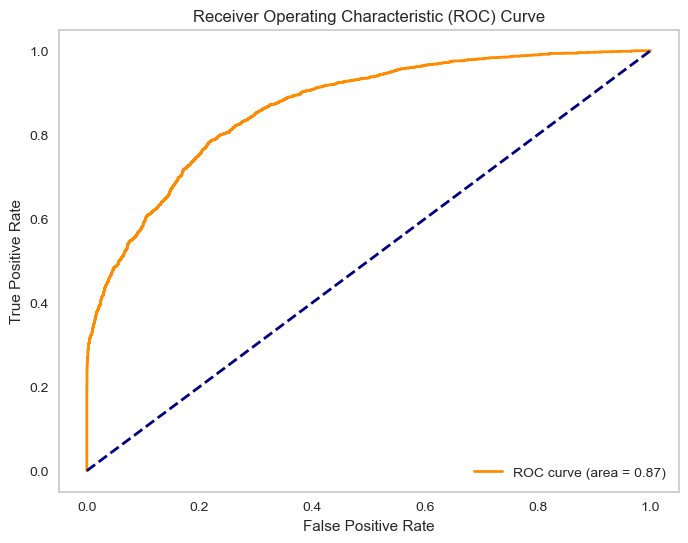

In [307]:
# Example Usage
final_model40, history40, report40, confusion40 = train_transformer_model(df_balanced, use_smote=True, sampling_strategy=0.40)

Epoch 1/50
1096/1096 [==============================] - 9s 5ms/step - loss: 0.5553 - accuracy: 0.7084 - val_loss: 0.5280 - val_accuracy: 0.7211
Epoch 2/50
1096/1096 [==============================] - 5s 5ms/step - loss: 0.5294 - accuracy: 0.7282 - val_loss: 0.5107 - val_accuracy: 0.7380
Epoch 3/50
1096/1096 [==============================] - 6s 5ms/step - loss: 0.5151 - accuracy: 0.7393 - val_loss: 0.4987 - val_accuracy: 0.7395
Epoch 4/50
1096/1096 [==============================] - 5s 5ms/step - loss: 0.4985 - accuracy: 0.7484 - val_loss: 0.4824 - val_accuracy: 0.7618
Epoch 5/50
1096/1096 [==============================] - 5s 5ms/step - loss: 0.4827 - accuracy: 0.7588 - val_loss: 0.4744 - val_accuracy: 0.7575
Epoch 6/50
1096/1096 [==============================] - 5s 5ms/step - loss: 0.4733 - accuracy: 0.7661 - val_loss: 0.4613 - val_accuracy: 0.7705
Epoch 7/50
1096/1096 [==============================] - 5s 5ms/step - loss: 0.4633 - accuracy: 0.7710 - val_loss: 0.4498 - val_accuracy:

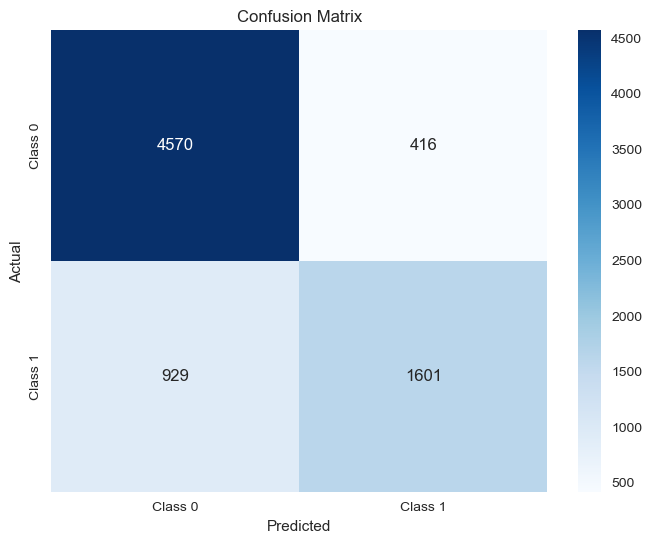

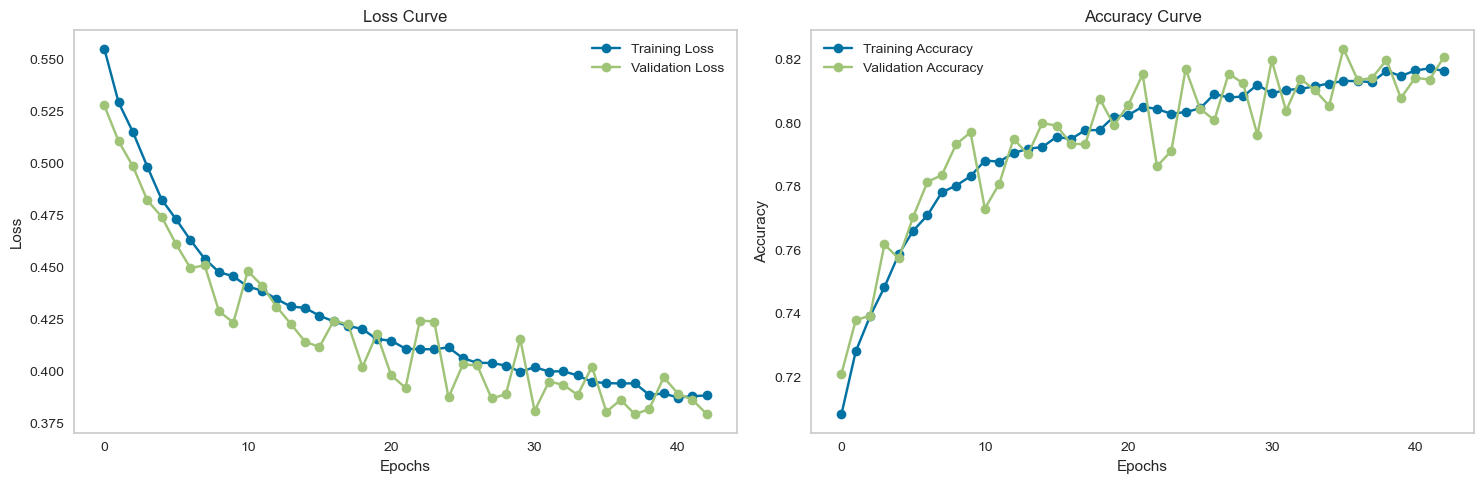

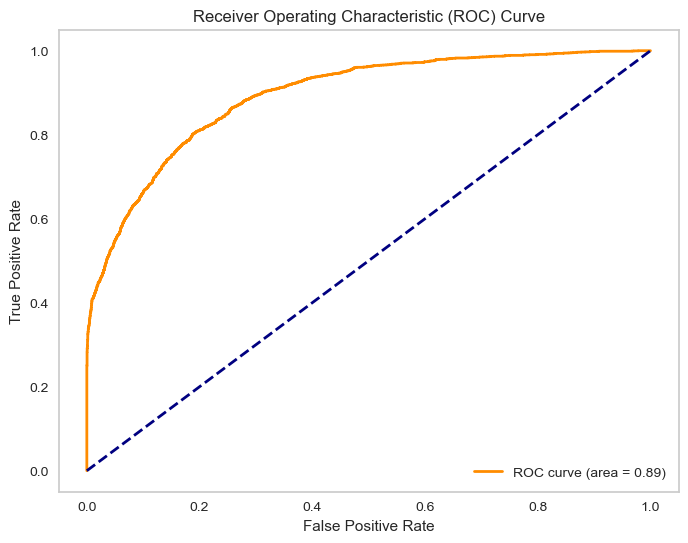

In [308]:
# Example Usage
final_model50, history50, report50, confusion50 = train_transformer_model(df_balanced, use_smote=True, sampling_strategy=0.50)

Epoch 1/50
1170/1170 [==============================] - 9s 6ms/step - loss: 0.5656 - accuracy: 0.6997 - val_loss: 0.5494 - val_accuracy: 0.7217
Epoch 2/50
1170/1170 [==============================] - 6s 5ms/step - loss: 0.5402 - accuracy: 0.7233 - val_loss: 0.5165 - val_accuracy: 0.7482
Epoch 3/50
1170/1170 [==============================] - 6s 5ms/step - loss: 0.5231 - accuracy: 0.7375 - val_loss: 0.5189 - val_accuracy: 0.7403
Epoch 4/50
1170/1170 [==============================] - 6s 5ms/step - loss: 0.5079 - accuracy: 0.7457 - val_loss: 0.4945 - val_accuracy: 0.7568
Epoch 5/50
1170/1170 [==============================] - 7s 6ms/step - loss: 0.4954 - accuracy: 0.7529 - val_loss: 0.4737 - val_accuracy: 0.7619
Epoch 6/50
1170/1170 [==============================] - 6s 5ms/step - loss: 0.4793 - accuracy: 0.7603 - val_loss: 0.4642 - val_accuracy: 0.7737
Epoch 7/50
1170/1170 [==============================] - 6s 5ms/step - loss: 0.4688 - accuracy: 0.7662 - val_loss: 0.4840 - val_accuracy:

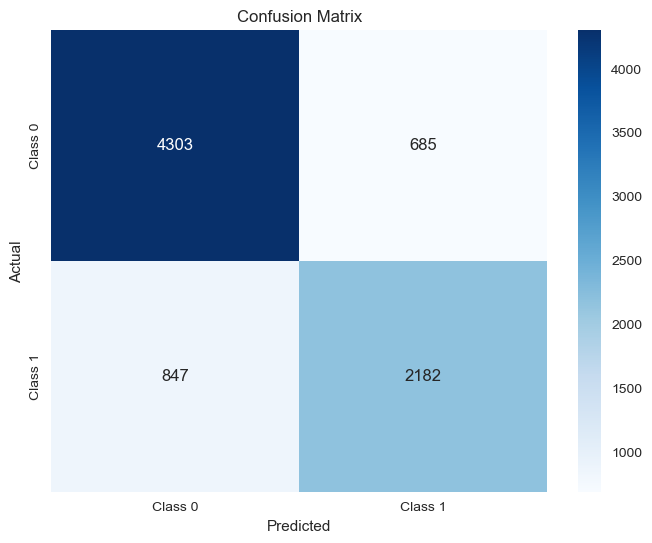

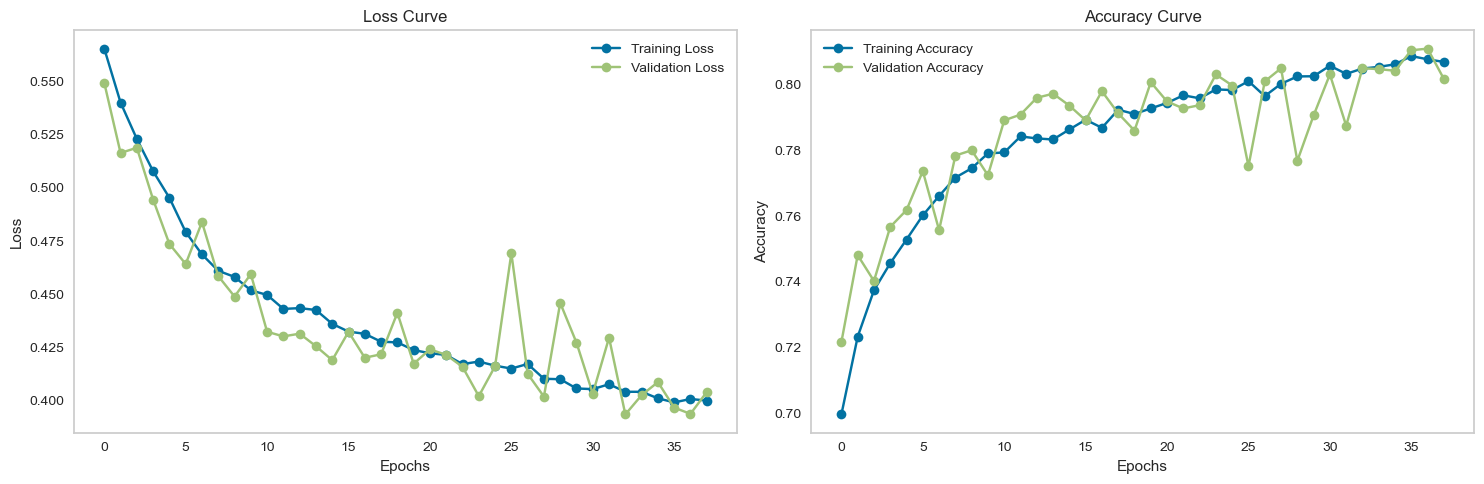

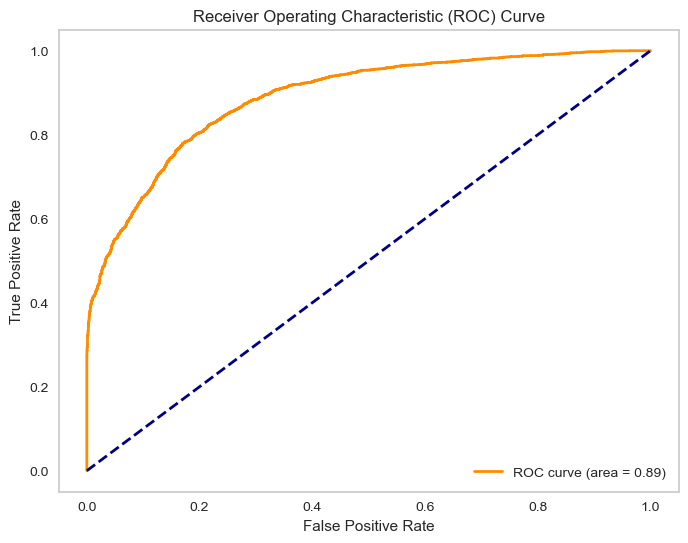

In [309]:
# Example Usage
final_model60, history60, report60, confusion60 = train_transformer_model(df_balanced, use_smote=True, sampling_strategy=0.60)

209/209 [==============================] - 1s 2ms/step


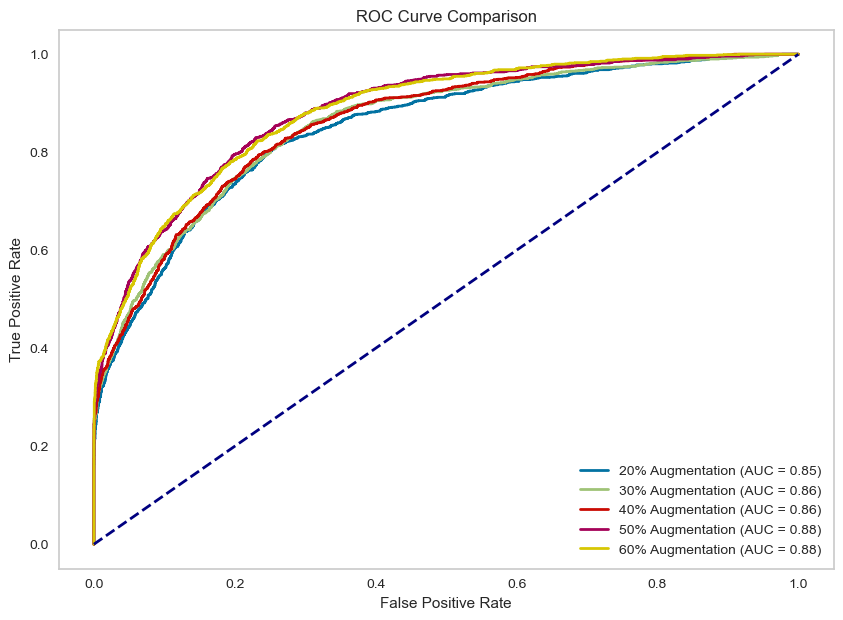

In [310]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curves for multiple models
def plot_roc_curves(models, labels, X_test_transformed, y_test):
    plt.figure(figsize=(10, 7))
    for model, label in zip(models, labels):
        # Predict probabilities for the positive class
        y_pred_prob = model.predict(X_test_transformed).flatten()
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f"{label} (AUC = {roc_auc:.2f})")
    
    # Plot baseline
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.title("ROC Curve Comparison")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Assuming `X_test_transformed` and `y_test` are available
plot_roc_curves(
    models=[final_model20, final_model30,final_model40, final_model50, final_model60],
    labels=["20% Augmentation", "30% Augmentation", "40% Augmentation", "50% Augmentation", "60% Augmentation"],
    X_test_transformed=X_test_transformed,
    y_test=y_test
)


In [311]:
feature_names = [f"Feature {i+1}" for i in range(X_train_scaled.shape[1])]

In [312]:
# Clear all plots
plt.close("all")

# Define prediction function
def predict_fn(X):
    X_transformed = np.expand_dims(X, axis=1)
    prob_class_1 = final_model50.predict(X_transformed)
    prob_class_0 = 1 - prob_class_1
    return np.hstack([prob_class_0, prob_class_1])

# Reinitialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=[f"Feature {i+1}" for i in range(X_train_scaled.shape[1])],
    class_names=["Normal", "Anomaly"],
    mode="classification"
)

# Select a fresh sample 38 48 49
sample_index = 38
sample = X_test_scaled[sample_index].reshape(1, -1)

# Predict probabilities
predicted_probabilities = predict_fn(sample)
predicted_class = np.argmax(predicted_probabilities)

# Generate explanation
explanation = explainer.explain_instance(
    data_row=sample.flatten(),
    predict_fn=predict_fn,
    labels=[predicted_class],
    num_features=len(X_train_scaled[0]),
    num_samples=5000
)

# Force refresh in notebook
from IPython.display import clear_output
clear_output(wait=True)
plt.close("all")
# # Display explanation
# fig = explanation.as_pyplot_figure(label=predicted_class)
# plt.show(fig)


explanation.show_in_notebook()


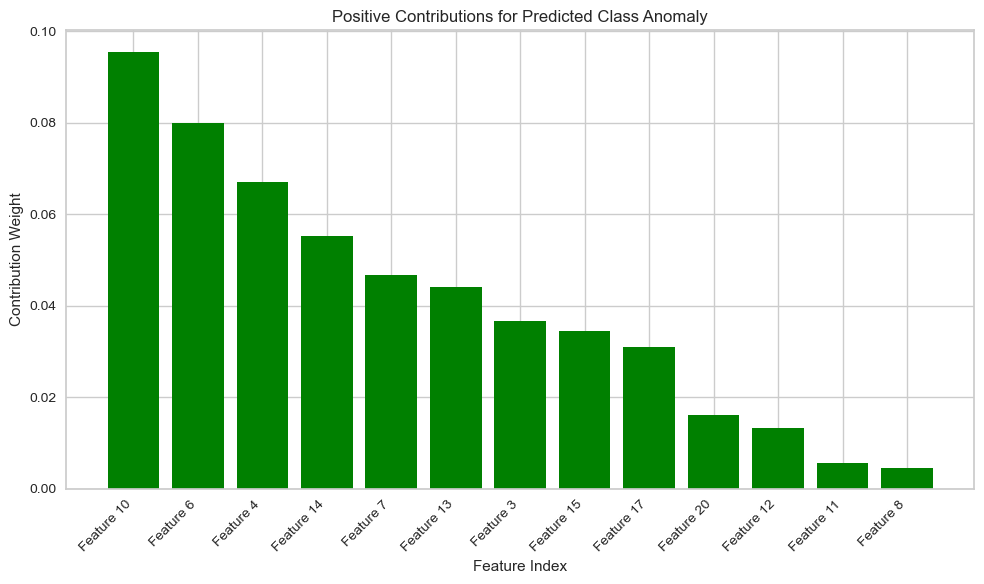

In [313]:
# Define feature names consistently
feature_names = [f"Feature {i+1}" for i in range(X_train_scaled.shape[1])]

# Extract positive contributions from the LIME explanation
try:
    positive_features = [
        (feature_names[feature], weight)  # Use feature names from your list
        for feature, weight in explanation.local_exp[predicted_class]  # Directly access tuples in local_exp
        if weight > 0  # Consider only positive weights
    ]
except KeyError:
    # If the expected label is not found, use the first available label as a fallback
    adjusted_label = list(explanation.local_exp.keys())[0]
    positive_features = [
        (feature_names[feature], weight)
        for feature, weight in explanation.local_exp[adjusted_label]
        if weight > 0
    ]

# Sort positive contributions by weight in descending order
positive_features = sorted(positive_features, key=lambda x: x[1], reverse=True)

# Plotting the positive contributions
features, weights = zip(*positive_features) if positive_features else ([], [])
plt.figure(figsize=(10, 6))
plt.bar(features, weights, color="green")
plt.xlabel("Feature Index")
plt.ylabel("Contribution Weight")
plt.title(f"Positive Contributions for Predicted Class {'Normal' if predicted_class == 0 else 'Anomaly'}")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [314]:
# Assuming the function predict_fn is defined and works correctly, we need to find the indices
# of the rows in the first 100 samples of X_test_scaled that are predicted as anomalies.

# Predict probabilities for the first 100 samples
samples = X_test_scaled[:100]
predicted_probabilities = predict_fn(samples)

# Identify indices where the predicted class is anomaly (class 1)
predicted_classes = np.argmax(predicted_probabilities, axis=1)
anomaly_indices = np.where(predicted_classes == 1)[0]

# Output the indices
anomaly_indices


4/4 [==============================] - 0s 3ms/step


array([10, 16, 19, 21, 26, 30, 36, 38, 46, 49, 51, 57, 73, 75, 85, 95],
      dtype=int64)

In [315]:
# True labels for the first 100 samples
true_labels = y_test[:100]

# Identify indices where both predicted and true labels are anomalies
correct_anomaly_indices = np.where((predicted_classes == 1) & (true_labels == 1))[0]

# Output the indices
correct_anomaly_indices


array([10, 26, 30, 36, 38, 49, 57, 73, 75, 95], dtype=int64)